# Ajuste por Mínimos Cuadrados

Ajustar nos permite acercar una función analítica a un conjunto de datos, usualmente experimentales, que contiene errores aleatorios. Partamos de una función lineal de ajuste
$$ y = x_1 t + x_2 $$
Con los siguientes datos
$$ y_i = x_1 t_i + x_2 +\epsilon_i, i=1,2,3...$$
donde los parámetros $x_1$ y $x_2$ se quieren encontrar, a partir de los datos $y_i$ y $t_i$. Asumiendo que el error tiene una distribución normal, con media 0, podemos minimizar su energía:
$$ \min_{\textbf{x}}\sum_i{(\epsilon^2_i)}=\min_{\textbf{x}}\sum_i {(y_i - x_1 t_i - x_2)^2}$$


En forma vectorial se podría escribir de la forma
$$\textbf{b}=\textbf{A} \textbf{x} + \textbf{$\epsilon$}$$
donde
$\textbf{b}=\begin{bmatrix}
y_1\\
y_2\\
:\\
y_N
\end{bmatrix}$ son los datos observados, 
$\textbf{A}=\begin{bmatrix}
t_1 & 1\\
t_2 & 1\\
: & :\\
t_N &1
\end{bmatrix}$ son los puntos de observación, y 
$\textbf{x}=\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix}$ son los parámetros de ajuste.\
Se busca la minimización de $\left \|\textbf{b-Ax} \right \|$, con solución:
$$\textbf{A}^T\textbf{Ax}=\textbf{A}^T\textbf{b}$$


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

Definimos la función

In [2]:
def f(t):
    return 3*t+4

Se encuentra el valor de la función en un intervalo $[a,b]$ en $N$ pasos

In [3]:
a=-1
b=3
e=1
N=100
Ne=20
t = np.linspace(a,b,N)
y=f(t)
te = np.linspace(a,b,Ne)
ee=e*random.randn(Ne)
ye=f(te)+ee

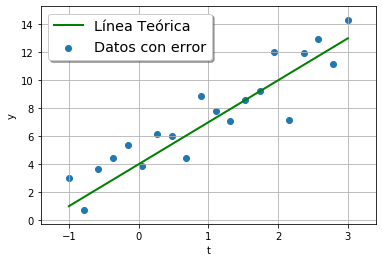

In [4]:
plt.plot(t, y, lw=2, c='green' ,label='Línea Teórica')
plt.axis([a-0.1*(b-a), b+0.1*(b-a), min(ye)-1, max(ye)+1])
plt.grid(True)
plt.scatter(te,ye,label='Datos con error')
plt.xlabel('t')
plt.ylabel('y')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')

Configuración del sistema lineal $A^TAx=A^Tb$ y su solución

In [5]:
A=np.matrix(np.transpose([te, (np.ones(Ne))]))
At=np.transpose(A)
ye = ye.reshape(-1,1)
p=np.linalg.solve(At*A,At*ye)
p

matrix([[2.72200322],
        [4.71699651]])

Se evalua con los nuevos coeficientes

In [23]:
y2=np.polyval(p,t)
error=np.sqrt(np.dot((y2-y),(y2-y))/Ne)
error

0.23985347446986754

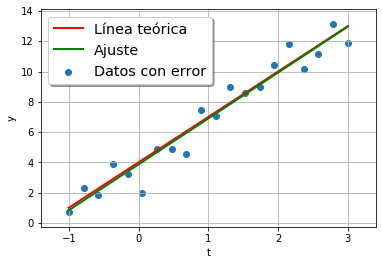

In [24]:
plt.plot(t, y, lw=2, c='red',label='Línea teórica')
plt.scatter(te,ye,label='Datos con error')
plt.plot(t,y2,lw=2,c='green',label='Ajuste')
plt.axis([a-0.1*(b-a), b+0.1*(b-a), min(ye)-1, max(ye)+1])
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')

Para un polinomio de mayor orden: $y=t^4+3t^3+2t^2-5t+7$

La matriz $\textbf{A}$ es ahora la matriz de Vandermonde:
$$\textbf{A} \textbf{x} =\begin{bmatrix}
t_1^4 & t_1^3 & t_1^2 & t_1 & 1   \\
t_2^4 & t_2^3 & t_2^2 & t_2 & 1\\
: & : & : & : & : \\
t_N^4 & t_N^3 & t_N^2 & t_N & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
3\\
2 \\
-5 \\
7
\end{bmatrix} 
= \begin{bmatrix}
y_1 \\
y_2\\
: \\
y_N
\end{bmatrix}
=\textbf{b}
$$ 

In [15]:
c=[1,3,2,-5,7]
e=4
y=np.polyval(c,t)
ye=np.polyval(c,te)+e*random.randn(Ne)
A=np.matrix(np.vander(te,5))
At=np.transpose(A)
ye = ye.reshape(-1,1)
p=np.linalg.solve(At*A,At*ye)
p

matrix([[ 0.81151428],
        [ 3.79914373],
        [ 1.90731917],
        [-7.20736238],
        [ 6.10529071]])

In [16]:
y2=np.polyval(p,t)
error=np.sqrt(np.dot((y2-y),(y2-y))/Ne)
error

4.251712377155041

C:\Users\Portatil\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


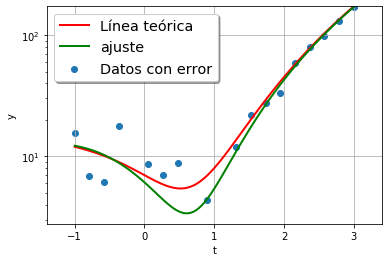

In [17]:
plt.semilogy(t, y, lw=2, c='red' , label = 'Línea teórica')
plt.scatter(te,ye, label='Datos con error')
plt.semilogy(t,y2,lw=2,c='green', label='ajuste')
plt.axis([a-0.1*(b-a), b+0.1*(b-a), min(ye)-1, max(ye)+1])
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')

Text(0, 0.5, 'error')

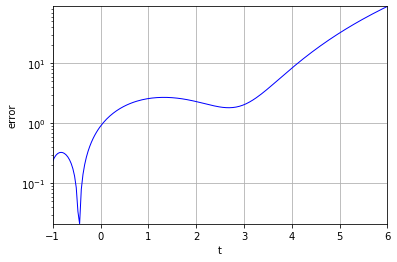

In [18]:
t3=np.linspace(a,2*b,2*N)
y3=np.polyval(c,t3)
y4=np.polyval(p,t3)
plt.semilogy(t3,abs(y4-y3), lw=1, c='blue')
plt.axis([min(t3), max(t3), min(abs(y4-y3)), max(abs(y4-y3))])
plt.grid(True)
plt.xlabel('t')
plt.ylabel('error')